In [3]:
# CS-575, final Project, Viacheslav Zhuravlev
from numpy import *
import numpy as np
from numpy import linalg as LA

import time
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def Lanczos_func(A, b, iters):     # function for Lanczos iterations. Input: symm (square) matrix A, vector b of size of A and a number of iterations
    A_size = shape(A)[0]           # determine number of columns (same as number of rows) of matrix A 
    Q = np.zeros((A_size, iters + 1))     # creating matrix Q for equality "T = Q^t A Q" and fill in with zeros
    diag_vect = np.zeros((iters))         # vector for main diag, size = number of itetations. Number of iter = size of Q. For large matrices iter << size A.
    s_diag = np.zeros((iters))            # vector for sub- and super-diagonals 
    Q[:,0] = b / np.linalg.norm(b)        # first column of Q is normalized vector b
    # The Lanczos iteration loop
    for i in range(iters):
        v = np.dot(A, Q[:,i])             # vector = product of A and i-th column of Q (starting from the 1st column of Q)
        diag_vect[i] = np.dot(Q[:,i],v)   # update i-th elem. of main diag of Q
        if i == 0:                        # update vector v in 1-st iteration (elements of s_diag participate starting from 2-nd iter.)
            v = v - diag_vect[i] * Q[:,i] 
        else:                   
            v = v - s_diag[i-1] * Q[:,i-1] - diag_vect[i] * Q[:,i]     # updating vector v using main diag and s-diag elements
        s_diag[i] = np.linalg.norm(v)     # update element of sub- and super-diagonals
        Q[:,i+1] = v / s_diag[i]          # new column of Q is normalized vector v
    return Q                              # returning matrix Q

In [6]:
N_arr = np.array([4, 8, 16, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])

time_list_Lanczos = [] #empty list for saving times
time_list_eigh = [] #empty list for saving times

for N in N_arr: 
    print("N", N)
    #A = np.random.rand(N,N)   # generating random matrix
    A = np.random.randint(1,100, size=(N,N))
    #print("A:\n", A)
    As = A + A.transpose()    # making the matrix to be symmetric
    #print("As:\n", As)
    b = np.ones(N)            # generating a vector of 1s
    #print("b:\n", b)

       # tested iters = 0.9 * N, N/2, N/4, N/8/, N/16 
    iters = int(N / 4)      # iterations as a fraction of number of columns(or rows) of Matrix A
    # for N / 4 doubling of max starts at 60

    t_start = time.time()     # reading system time before the multiplication
    Q = Lanczos_func(As, b, iters)
    T_m = np.dot(np.dot(Q.T,A),Q)    # computing Tridiagonal matrix based of Q, returned from Lanczos_func
    [V,D] = np.linalg.eigh(T_m)      # computing eigenvalues of the Tridiagonal matrix T_m = the Ritz values
    t_end = time.time()       # reading system time when multiplication is done
    time_list_Lanczos.append(t_end - t_start)   # adding a delay for a part. matrix to list
    #print ('time spent with Lanczos = ', t_end - t_start)
    print("E-value estimates:\n", V)

    t_start_e = time.time() 
    vals, vects = np.linalg.eigh(A)  # computing the true eigenvalues for A
    t_end_e = time.time()
    #print ('time spent with eigh() = ', t_end_e - t_start_e)
    print("True E-values:\n", vals)

    time_list_eigh.append(t_end_e - t_start_e)   # adding a delay for a part. multiplication to list


N 4
E-value estimates:
 [ 22.73930286 204.64098716]
True E-values:
 [-99.70010986 -62.90076025  35.72365381 267.8772163 ]
N 8
E-value estimates:
 [-74.13341083  30.77633887 412.04866681]
True E-values:
 [-119.21596392  -90.12605836  -48.15855492  -19.67064564   35.76931902
   95.67708301  115.08251687  382.64230393]
N 16
E-value estimates:
 [-117.86212096  -81.48417174   59.27996699   99.73921837  813.01346262]
True E-values:
 [-203.72483164 -161.70615618 -105.31490845  -95.04947967  -93.36897719
  -57.01950138  -37.91851887   -3.84381799   15.70328186   44.68364095
   63.17810344   92.87676496  114.47914887  152.22970567  182.02299215
  820.77255346]
N 20
E-value estimates:
 [-179.53489904  -53.29391571  -10.85364696   15.56035693  142.37282461
  991.27126691]
True E-values:
 [-200.36042269 -167.9026204  -155.63787693 -136.80827522 -124.11372221
 -106.79149704  -99.86771847  -29.75833901  -21.4230576   -12.65231325
   19.08550319   43.30933159   45.56445885   56.20842717   90.9831965


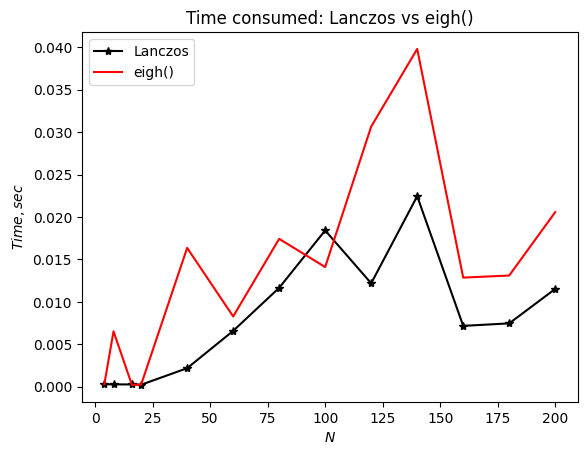

In [ ]:
# Time Plot 
plt.plot(N_arr, time_list_Lanczos, 'k-*', label = 'Lanczos')
plt.plot(N_arr, time_list_eigh,'r-', label='eigh()')
plt.title('Time consumed: Lanczos vs eigh()')
plt.xlabel('$N$')
plt.ylabel('$Time, sec$')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Legacy code (first experiments)

# matrix A of size 8 * 8
# d - dense, s - sparse 
A8_d = np.array([[1,1,1,1,1,1,1,1],[1,2,2,2,2,2,2,2],[1,2,3,3,3,3,3,3],[1,2,3,4,4,4,4,4],[1,2,3,4,5,5,5,5],[1,2,3,4,5,6,6,6],[1,2,3,4,5,6,7,7],[1,2,3,4,5,6,7,8] ]) # good result
A8_s = np.array([[1,0,0,1,0,0,0,0],[0,2,0,0,0,0,0,0],[0,0,3,0,0,3,0,0],[1,0,0,4,0,0,0,0],[0,0,0,0,5,5,0,0],[0,0,3,0,5,6,0,6],[0,0,0,0,0,0,7,0],[0,0,0,0,0,6,0,8] ]) # good result

A = A8_d   # choosing the input matrix 
print(A)
iters = 3   # setting number if iterations
b = np.array([1,1,1,1,1,1,1,1])   # vector b (initial guess) must of be size = number of columns(or rows) of A

t_start = time.time()     # reading system time before the multiplication
Q = Lanczos_func(A, b, iters)
T_m = np.dot(np.dot(Q.T,A),Q)    # computing Tridiagonal matrix based of Q, returned from Lanczos_func
[V,D] = np.linalg.eigh(T_m)      # computing eigenvalues of the Tridiagonal matrix T_m = the Ritz values
t_end = time.time()       # reading system time when multiplication is done
#[V,D]
print ('time spent with Lanczos = ', t_end - t_start)
print("E-value estimates:\n", V)

t_start_e = time.time() 
vals, vects = np.linalg.eigh(A)  # computing the true eigenvalues for A
t_end_ = time.time()
print ('time spent with eigh() = ', t_end_ - t_start_e)

print("TRUE E-values:\n", vals)

[[1 1 1 1 1 1 1 1]
 [1 2 2 2 2 2 2 2]
 [1 2 3 3 3 3 3 3]
 [1 2 3 4 4 4 4 4]
 [1 2 3 4 5 5 5 5]
 [1 2 3 4 5 6 6 6]
 [1 2 3 4 5 6 7 7]
 [1 2 3 4 5 6 7 8]]
time spent with Lanczos =  0.0007529258728027344
E-value estimates:
 [ 0.47857447  1.21823337  3.33789427 29.36529789]
time spent with eigh() =  0.0018155574798583984
TRUE E-values:
 [ 0.25873593  0.28752009  0.34584404  0.45776296  0.68838568  1.25828783
  3.33816557 29.36529789]


In [ ]:
# matrix A of size 16 * 16
# A16_d - dense, A16_s - sparse 
A16_d = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2],[1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3],[1,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4],[1,2,3,4,5,5,5,5,5,5,5,5,5,5,5,5],[1,2,3,4,5,6,6,6,6,6,6,6,6,6,6,6],[1,2,3,4,5,6,7,7,7,7,7,7,7,7,7,7],[1,2,3,4,5,6,7,8,8,8,8,8,8,8,8,8],
                  [1,2,3,4,5,6,7,8,9,9,9,9,9,9,9,9],[1,2,3,4,5,6,7,8,9,0,0,0,0,0,0,0],[1,2,3,4,5,6,7,8,9,0,1,1,1,1,1,1],[1,2,3,4,5,6,7,8,9,0,1,2,2,2,2,2],[1,2,3,4,5,6,7,8,9,0,1,2,3,3,3,3],[1,2,3,4,5,6,7,8,9,0,1,2,3,4,4,4],[1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,5],[1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6]]) # good result
A16_s = np.array([[1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1],[1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0],[0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1],[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0],[1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1]]) # good result
A = A16_s   # choosing the input matrix 
print(A)
iters = 15   # setting number if iterations
b = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])   # vector b (initial guess) must of be size = number of columns(or rows) of A

t_start = time.time()     # reading system time before the multiplication
Q = Lanczos_func(A, b, iters)
T_m = np.dot(np.dot(Q.T,A),Q)    # computing Tridiagonal matrix based of Q, returned from Lanczos_func
[V,D] = np.linalg.eigh(T_m)      # computing eigenvalues of the Tridiagonal matrix T_m = the Ritz values
t_end = time.time()       # reading system time when multiplication is done
#[V,D]
print ('time spent with Lanczos = ', t_end - t_start)
print("E-value estimates:\n", V)

t_start_e = time.time() 
vals, vects = np.linalg.eigh(A)  # computing the true eigenvalues for A
t_end_ = time.time()
print ('time spent with eigh() = ', t_end_ - t_start_e)

print("TRUE E-values:\n", vals)


[[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1]]
time spent with Lanczos =  0.0036733150482177734
E-value estimates:
 [-1.69551813e+00 -8.28427125e-01 -5.75345393e-16 -2.60849259e-16
 -5.48536822e-17  1.82810616e-16  3.97729726e-16  7.08507739e-16
  7.93988603e-16  1.57923240e-15  4.69266271e-01  2.00000000e+00
  3.53073373e+00  4.00000000e+00  4.82842712e+00  5.69551813e+00]
time spent with eigh() =  0.0002887248992919922
TRUE E-values:
 [-0.84775907 -0.41421356 -0.41421356  0.     

In [ ]:
# Matrix A 
# May 2: n = 14   # A will be (n+2)*(n+2)
# May 2: diag_vector = np.concatenate((np.linspace(0., 2., n), np.array([2.5, 3.])))
#A = np.diag(diag_vector)
#A = np.array([ [3.,1.,4.,1.], [5.,9.,2.,6.], [5.,3.,5.,8.], [9.,7.,9.,3.] ])
#A = np.array([ [1.,0.,0.,9.], [0.,1.,0.,5.], [0.,0.,1.,0.], [9.,5.,0.,1.] ])
#A = np.array([ [1, 1, 1], [1, 4, 3], [1, 3, 1] ])
A4_d = np.array([ [1.,1.,1.,1.], [1.,2.,0.,5.], [1.,0.,4.,3.], [1.,5.,3.,1.] ]) # good result
A4_s = np.array([ [1.,0.,0.,1.], [0.,1.,0.,1.], [0.,0.,0.,0.], [1.,1.,0.,1.] ]) # ? why result
A8_d = np.array([[1,1,1,1,1,1,1,1],[1,2,2,2,2,2,2,2],[1,2,3,3,3,3,3,3],[1,2,3,4,4,4,4,4],[1,2,3,4,5,5,5,5],[1,2,3,4,5,6,6,6],[1,2,3,4,5,6,7,7],[1,2,3,4,5,6,7,8] ]) # good result
A8_s = np.array([[1,0,0,1,0,0,0,0],[0,2,0,0,0,0,0,0],[0,0,3,0,0,3,0,0],[1,0,0,4,0,0,0,0],[0,0,0,0,5,5,0,0],[0,0,3,0,5,6,0,6],[0,0,0,0,0,0,7,0],[0,0,0,0,0,6,0,8] ]) # good result

A16_d = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2],[1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3],[1,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4],[1,2,3,4,5,5,5,5,5,5,5,5,5,5,5,5],[1,2,3,4,5,6,6,6,6,6,6,6,6,6,6,6],[1,2,3,4,5,6,7,7,7,7,7,7,7,7,7,7],[1,2,3,4,5,6,7,8,8,8,8,8,8,8,8,8],
                  [1,2,3,4,5,6,7,8,9,9,9,9,9,9,9,9],[1,2,3,4,5,6,7,8,9,0,0,0,0,0,0,0],[1,2,3,4,5,6,7,8,9,0,1,1,1,1,1,1],[1,2,3,4,5,6,7,8,9,0,1,2,2,2,2,2],[1,2,3,4,5,6,7,8,9,0,1,2,3,3,3,3],[1,2,3,4,5,6,7,8,9,0,1,2,3,4,4,4],[1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,5],[1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6]]) # good result

A16_s = np.array([[1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1],[1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0],[0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1],[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0],[1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1]]) # good result
A = A16_s
print(A)

# Initialize Q, alpha and beta
iters = 5 # 2 extreme e-vals are correct, 3 - 50% correctness
# Define a random initial vector
#b = np.random.randn(n+2)
#b = np.array([1, 1, 1, 1])
#b = np.array([1,1,1,1,1,1,1,1])
b = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])


Q = Lanczos_func(A, b, iters)     # 
# Calculation of eigenpairs of Hessenberg matrix
T_m = np.dot(np.dot(Q.T,A),Q)
[V,D] = np.linalg.eigh(T_m)
[V,D]
print("E-value estimates:\n", V)

vals, vects = np.linalg.eigh(A)
print("TRUE E-values:\n", vals)

[[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1]]
matrix Q:
 [[ 0.25        0.28022427 -0.33700977 -0.13069473 -0.03491396 -0.43278165]
 [ 0.25       -0.04003204  0.44343391  0.0644522   0.02236063 -0.11489453]
 [ 0.25       -0.04003204 -0.24832299 -0.23453439  0.15848586  0.47560709]
 [ 0.25       -0.36028835 -0.15963621  0.24527642  0.15809356 -0.11269208]
 [ 0.25       -0.04003204  0.09755546 -0.23095371 -0.23655191  0.01296999]
 [ 0.25       -0.04003204  0.44343391  0.0644522   0.

In [ ]:
# Calculation of eigenpairs of Hessenberg matrix
T_m = np.dot(np.dot(Q.T,A),Q)
[V,D] = np.linalg.eigh(T_m)
[V,D]
print("E-value estimates:\n", V)

E-value estimates:
 [-0.80167718 -0.1390971   0.92997175  1.75121315  2.37277548  2.84371133]


In [ ]:
vals, vects = np.linalg.eigh(A)
print("TRUE E-values:\n", vals)

TRUE E-values:
 [-0.84775907 -0.41421356 -0.41421356  0.          0.23463314  1.
  1.          1.          1.          1.          1.          1.76536686
  2.          2.41421356  2.41421356  2.84775907]
